#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import math
import string
import tensorflow as tf
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from nltk import word_tokenize, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GlobalAveragePooling1D, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Dataset
df=pd.read_csv('gdrive/My Drive/Data Sets/ClothingReviews.csv', index_col=False, engine='python')
print(df.shape)
df.head()

(23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df=df[['Review Text', 'Recommended IND']]
df.columns=['review', 'recommendation']
df.head()

,review,recommendation
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          22641 non-null  object
 1   recommendation  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


# Data Pre-Processing

## Dealing with missing values
Sum of null values

In [ ]:
df['review'].isna().sum()

845

Dropping null values

In [ ]:
df.dropna(inplace=True)

Verifying whether null values remain

In [ ]:
df['review'].isna().sum()

0

## Cleaning Text

Removing Punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

df['Text_Clean'] = df['review'].apply(lambda x: remove_punct(x))
df.head()

,review,recommendation,Text_Clean
0,Absolutely wonderful - silky and sexy and comf...,1,Absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,1,Love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,0,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,I love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,1,This shirt is very flattering to all due to th...


Removing Numbers

In [ ]:
def remove_digits(text):
    text_nodigit = ''
    text_nodigit = re.sub('\d', '', text)
    return text_nodigit

df['Text_Clean'] = df['Text_Clean'].apply(lambda x: remove_digits(x))
df.head()

,review,recommendation,Text_Clean
0,Absolutely wonderful - silky and sexy and comf...,1,Absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,1,Love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,0,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,I love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,1,This shirt is very flattering to all due to th...


Tokenizing text

In [ ]:
tokens = [word_tokenize(sen) for sen in df.Text_Clean]

In [ ]:
tokens

[['Absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable'],
 ['Love',
  'this',
  'dress',
  'its',
  'sooo',
  'pretty',
  'i',
  'happened',
  'to',
  'find',
  'it',
  'in',
  'a',
  'store',
  'and',
  'im',
  'glad',
  'i',
  'did',
  'bc',
  'i',
  'never',
  'would',
  'have',
  'ordered',
  'it',
  'online',
  'bc',
  'its',
  'petite',
  'i',
  'bought',
  'a',
  'petite',
  'and',
  'am',
  'i',
  'love',
  'the',
  'length',
  'on',
  'me',
  'hits',
  'just',
  'a',
  'little',
  'below',
  'the',
  'knee',
  'would',
  'definitely',
  'be',
  'a',
  'true',
  'midi',
  'on',
  'someone',
  'who',
  'is',
  'truly',
  'petite'],
 ['I',
  'had',
  'such',
  'high',
  'hopes',
  'for',
  'this',
  'dress',
  'and',
  'really',
  'wanted',
  'it',
  'to',
  'work',
  'for',
  'me',
  'i',
  'initially',
  'ordered',
  'the',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'but',
  'i',
  'found',
  'this',
  'to',
  'be',
  'outrageously',
  'small',
  's

Lowercase conversion

In [ ]:
def lower_token(tokens):
    return [w.lower() for w in tokens]

lower_tokens = [lower_token(token) for token in tokens]

Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
def token_lemmatize(token_list):
    return [lemmatizer.lemmatize(t) for t in token_list]

l_tokens = [token_lemmatize(sen) for sen in lower_tokens]

Stopwords removal

In [ ]:
stoplist = stopwords.words('english')
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [remove_stop_words(sen) for sen in l_tokens]

In [ ]:
result = [' '.join(sen) for sen in filtered_words]

In [ ]:
df['Text_Final'] = result

In [ ]:
df['tokens'] = filtered_words

In [ ]:
df.head()

,review,recommendation,Text_Clean,Text_Final,tokens
0,Absolutely wonderful - silky and sexy and comf...,1,Absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,Love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...,"[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,I love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,"[shirt, flattering, due, adjustable, front, ti..."


#Checking Data Imbalance
Checking distribution of data

In [ ]:
df['recommendation'].value_counts()

1    18540
0     4101
Name: recommendation, dtype: int64

In [ ]:
df['recommendation'].value_counts(normalize=True)

1    0.818868
0    0.181132
Name: recommendation, dtype: float64

Separating both classes in different dataframes

In [ ]:
df_zero = df[df['recommendation']==0]
df_one = df[df['recommendation']==1]

Undersampling the majority class

In [ ]:
df_one_u=df_one[:len(df_zero)]

In [ ]:
len(df_one_u)

4101

Creating balanced dataframe

In [ ]:
df=pd.concat([df_zero, df_one_u], sort=False, ignore_index=True)
df.head()

,review,recommendation,Text_Clean,Text_Final,tokens
0,I had such high hopes for this dress and reall...,0,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...,"[high, hope, dress, really, wanted, work, init..."
1,"I love tracy reese dresses, but this one is no...",0,I love tracy reese dresses but this one is not...,love tracy reese dress one petite foot tall us...,"[love, tracy, reese, dress, one, petite, foot,..."
2,Dress runs small esp where the zipper area run...,0,Dress runs small esp where the zipper area run...,dress run small esp zipper area run ordered sp...,"[dress, run, small, esp, zipper, area, run, or..."
3,"First of all, this is not pullover styling. th...",0,First of all this is not pullover styling ther...,first pullover styling side zipper wouldnt pur...,"[first, pullover, styling, side, zipper, would..."
4,"Loved the material, but i didnt really look at...",0,Loved the material but i didnt really look at ...,loved material didnt really look long dress wa...,"[loved, material, didnt, really, look, long, d..."


In [ ]:
df.tail()

,review,recommendation,Text_Clean,Text_Final,tokens
8197,Bought this top for date night -- something a ...,1,Bought this top for date night something a li...,bought top date night something little special...,"[bought, top, date, night, something, little, ..."
8198,I love this dress so much...what an excellent ...,1,I love this dress so muchwhat an excellent pur...,love dress muchwhat excellent purchase wear wh...,"[love, dress, muchwhat, excellent, purchase, w..."
8199,The reason i purchased these pants is because ...,1,The reason i purchased these pants is because ...,reason purchased pant dont anything like fun n...,"[reason, purchased, pant, dont, anything, like..."
8200,This is a great pair of trousers for work but ...,1,This is a great pair of trousers for work but ...,great pair trouser work also dressed flatterin...,"[great, pair, trouser, work, also, dressed, fl..."
8201,I love this top! i originally bought the brown...,1,I love this top i originally bought the brownp...,love top originally bought brownpurple pattern...,"[love, top, originally, bought, brownpurple, p..."


In [ ]:
df['recommendation'].value_counts()

0    4101
1    4101
Name: recommendation, dtype: int64

# Analysis of Review Length Distribution

Adding review length as a feature

In [ ]:
df['Review_length'] = df['Text_Final'].apply(len)
print(df.shape)
df.head()

(8202, 6)


,review,recommendation,Text_Clean,Text_Final,tokens,Review_length
0,I had such high hopes for this dress and reall...,0,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...,"[high, hope, dress, really, wanted, work, init...",310
1,"I love tracy reese dresses, but this one is no...",0,I love tracy reese dresses but this one is not...,love tracy reese dress one petite foot tall us...,"[love, tracy, reese, dress, one, petite, foot,...",265
2,Dress runs small esp where the zipper area run...,0,Dress runs small esp where the zipper area run...,dress run small esp zipper area run ordered sp...,"[dress, run, small, esp, zipper, area, run, or...",200
3,"First of all, this is not pullover styling. th...",0,First of all this is not pullover styling ther...,first pullover styling side zipper wouldnt pur...,"[first, pullover, styling, side, zipper, would...",247
4,"Loved the material, but i didnt really look at...",0,Loved the material but i didnt really look at ...,loved material didnt really look long dress wa...,"[loved, material, didnt, really, look, long, d...",195


Description of Review Length

In [ ]:
df['Review_length'].describe()

count    8202.00000
mean      186.95367
std        84.16240
min         8.00000
25%       116.00000
50%       183.00000
75%       266.00000
max       383.00000
Name: Review_length, dtype: float64

Histogram

<ipython-input-33-890d7072bab0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Review_length'] ,hist=True, bins=100)


<Axes: xlabel='Review_length', ylabel='Density'>

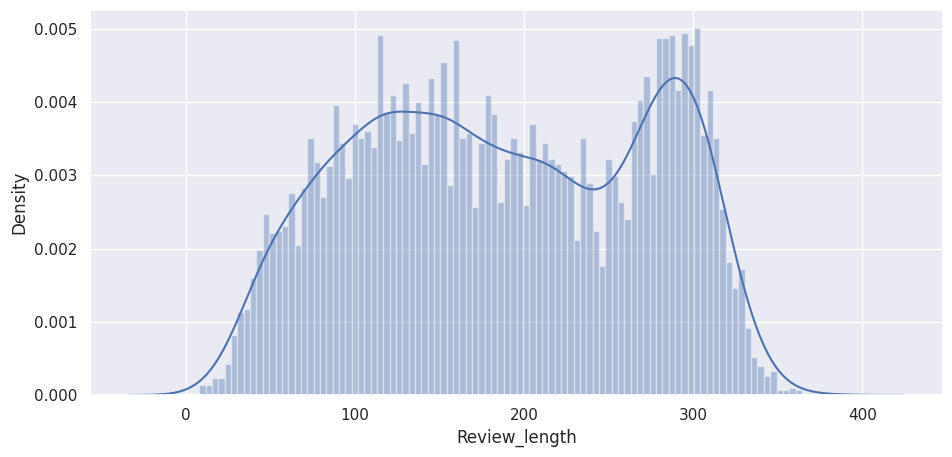

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(df['Review_length'] ,hist=True, bins=100)

Recommendation-wise distribution

In [ ]:
df_zero = df[df['recommendation']==0]
df_one = df[df['recommendation']==1]

<ipython-input-35-b00572c851a5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_zero[['Review_length']] ,hist=False)
<ipython-input-35-b00572c851a5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_one[['Review_length']], hist=False)


<Axes: ylabel='Density'>

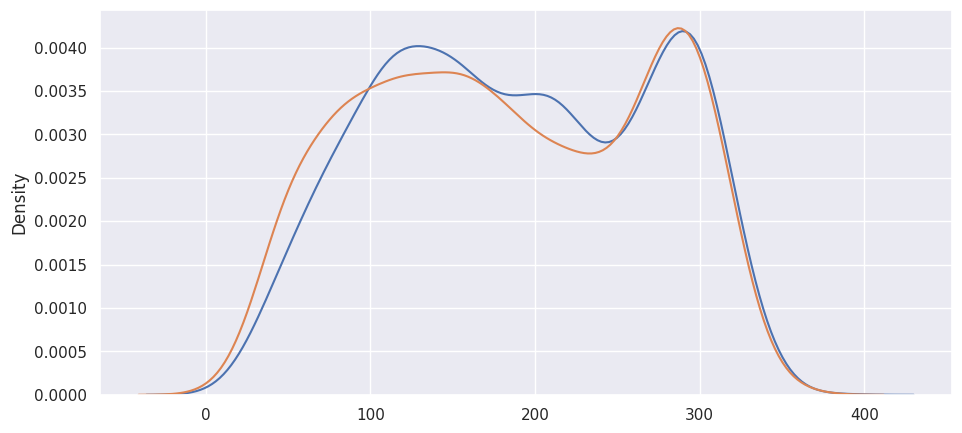

In [ ]:
sns.distplot(df_zero[['Review_length']] ,hist=False)
sns.distplot(df_one[['Review_length']], hist=False)

Preparing a list of all words in the data set

In [ ]:
#List of all words in the data set
word_list=[j  for i in df['tokens'] for j in i]

In [ ]:
#Finding no. of unique words
vocab_size=len(list(set(word_list)))

In [ ]:
vocab_size

9943

#Tokenization

In [ ]:
#prepare a tokenizer for reviews
x_tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)
x_tokenizer.fit_on_texts(df['Text_Final'])

#convert text sequences into integer sequences
x_seq    =   x_tokenizer.texts_to_sequences(df['Text_Final'])

word_index=x_tokenizer.word_index

In [ ]:
#padding zero upto maximum length
maxlen=400
pad_seqs=pad_sequences(x_seq, maxlen=maxlen, padding='post', truncating='post')

#size of vocabulary ( +1 for padding token)
vocab_size   =  len(x_tokenizer.word_index) + 1

In [ ]:
vocab_size

9944

In [ ]:
pad_seqs

array([[ 126,  363,    2, ...,    0,    0,    0],
       [   8, 1995, 2142, ...,    0,    0,    0],
       [   2,   44,   15, ...,    0,    0,    0],
       ...,
       [ 455,  107,   71, ...,    0,    0,    0],
       [  14,  145, 1017, ...,    0,    0,    0],
       [   8,    4,  877, ...,    0,    0,    0]], dtype=int32)

# Word2Vec Embeddings

In [ ]:
# Fixing word embedding dimensions
embedding_dim=300

In [ ]:
word2vec_model = Word2Vec(df['tokens'], vector_size=embedding_dim, min_count = 1, window = 5)
word_vectors=word2vec_model.wv
word_base=word_vectors.index_to_key

In [ ]:
embedding_matrix = np.zeros((len(word_base) + 1, embedding_dim))
for word in word_base:
    embedding_vector = word_vectors[word]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        if word in word_index.keys():
            embedding_matrix[word_index[word]] = embedding_vector

In [ ]:
word_base=list(word_base)

In [ ]:
word_base[3]

'top'

In [ ]:
len(word_base)

9943

In [ ]:
word_vectors["top"]

array([-0.09332012,  0.18503731,  0.00530833,  0.16431443,  0.14015158,
       -0.7100204 ,  0.33217442,  0.8478156 ,  0.20679452,  0.05932806,
        0.11880904, -0.12709206, -0.09404162,  0.02577716, -0.16669929,
       -0.18341973,  0.29674152,  0.03989822,  0.03605959, -0.33669654,
       -0.17156726, -0.08837238,  0.19377743, -0.06249202,  0.30351037,
       -0.14965735, -0.42262828, -0.05374201, -0.18972148, -0.28788522,
        0.22966099, -0.14729647,  0.12826683,  0.10864848, -0.13326092,
        0.11669365,  0.11806467, -0.36216223, -0.18075785,  0.15110551,
       -0.21588665, -0.09047942, -0.10792129, -0.22893271,  0.09521151,
        0.3147969 ,  0.14789122,  0.17759241, -0.01035705,  0.4828277 ,
        0.16043171, -0.15942186, -0.2722602 ,  0.12956512, -0.26317188,
        0.3672491 ,  0.17530887, -0.10468187, -0.04107249,  0.23509875,
       -0.09243362, -0.14657517,  0.02918481,  0.09975487, -0.04146685,
        0.17495133,  0.07641181,  0.22829598, -0.25261566, -0.24

# Train Test Split

In [ ]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(pad_seqs,df['recommendation'],test_size=0.15,random_state=21,shuffle=True)

In [ ]:
#Splitting into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=42,shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6273, 400)
(6273,)
(698, 400)
(698,)
(1231, 400)
(1231,)


# Model

Clearing session

In [ ]:
from keras import backend as K
K.clear_session()

Model Definition

In [ ]:
#Using ANN
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# #Using LSTM
# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,  restore_best_weights=True)
best_model = ModelCheckpoint("model_best.h5", monitor='val_accuracy', verbose=0, save_best_only=True)

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

Model compilation

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 300)          2983200   
                                                                 
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 200)               24000200  
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5

Fit model

In [ ]:
history=model.fit(X_train, y_train,
                  epochs=10,
                  verbose=True,
                  callbacks=[best_model, es],
                  validation_data=(X_val, y_val),
                  batch_size=16)

Epoch 1/10
393/393 [==============================] - 41s 89ms/step - loss: 0.6761 - accuracy: 0.6118 - val_loss: 0.4596 - val_accuracy: 0.7894
Epoch 2/10
393/393 [==============================] - 9s 22ms/step - loss: 0.4140 - accuracy: 0.8167 - val_loss: 0.4079 - val_accuracy: 0.8223
Epoch 3/10
393/393 [==============================] - 8s 20ms/step - loss: 0.3155 - accuracy: 0.8750 - val_loss: 0.3815 - val_accuracy: 0.8352
Epoch 4/10
393/393 [==============================] - 5s 13ms/step - loss: 0.2242 - accuracy: 0.9147 - val_loss: 0.4515 - val_accuracy: 0.8166
Epoch 5/10
393/393 [==============================] - 5s 12ms/step - loss: 0.1646 - accuracy: 0.9396 - val_loss: 0.4725 - val_accuracy: 0.8324
Epoch 6/10
393/393 [==============================] - 5s 12ms/step - loss: 0.0979 - accuracy: 0.9660 - val_loss: 0.6210 - val_accuracy: 0.8052
Epoch 7/10
393/393 [==============================] - 4s 11ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.7705 - val_accuracy: 0.806

Loading the best model weights

In [ ]:
model.load_weights('model_best.h5')

Plot of training vs validation accuracy and loss

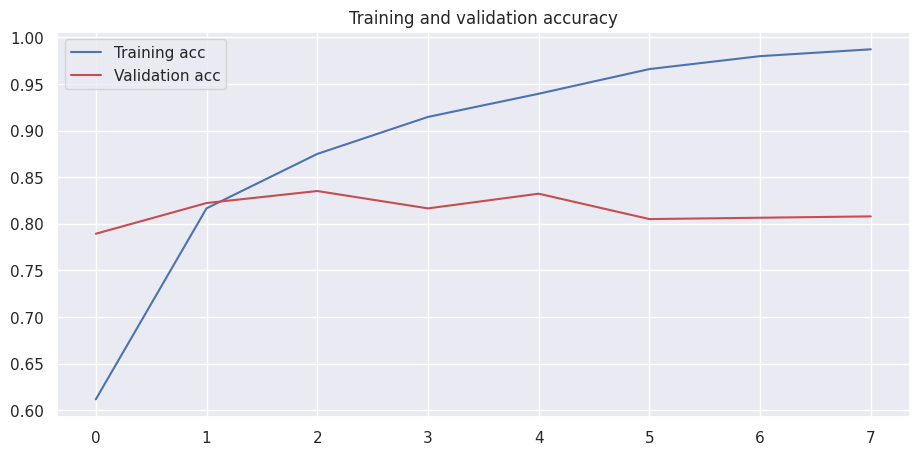

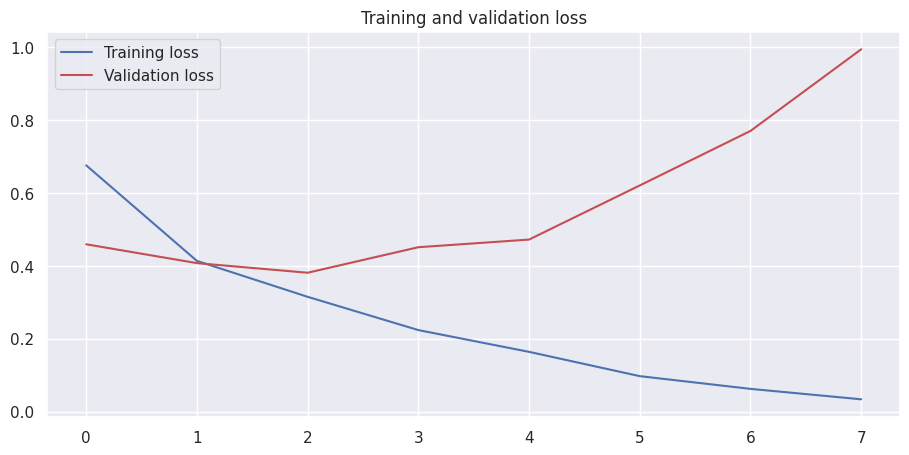

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluating the Model

In [ ]:
y_hat=model.predict(X_test)[:,0]

39/39 [==============================] - 0s 2ms/step


In [ ]:
y_hat

array([0.40756583, 0.00807215, 0.00874009, ..., 0.7685487 , 0.35823044,
       0.09516221], dtype=float32)

In [ ]:
y_hat_sent=[np.round_(i) for i in y_hat]

In [ ]:
print(y_hat_sent)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
print(np.array(y_test))

[0 0 0 ... 1 0 0]


In [ ]:
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#This part is for the confusion matrix and accuracy score
cf_matrix = confusion_matrix(y_test, y_hat_sent)
print ('Confusion Matrix :')
print(cf_matrix)
print ('Accuracy Score :',accuracy_score(y_test, y_hat_sent))
print ('Report : ')
print (classification_report(y_test, y_hat_sent) )


Confusion Matrix :
[[541  88]
 [106 496]]
Accuracy Score : 0.8424045491470349
Report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       629
           1       0.85      0.82      0.84       602

    accuracy                           0.84      1231
   macro avg       0.84      0.84      0.84      1231
weighted avg       0.84      0.84      0.84      1231

